
Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|.......... ........|                                                           
|..   .  ..       ..|                                                           
|.... ..... ..... ..|                                                           
|..     .....   . ..|                                                           
|.. ... ... ... . ..|                                                           
|@. . . .>. . . . ..|                                                           
|.... ..... . ......|      

NameError: name 'build_path_HillClimb' is not defined

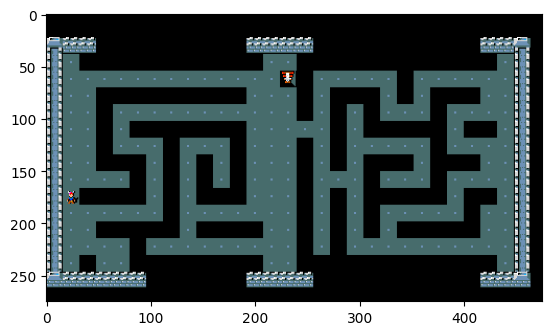

In [2]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from collections import deque
from queue import PriorityQueue
from utilsMinihackSearch import *
from typing import Tuple, List


# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/custom_maze.des",
)
state = env.reset()
env.render()
def hill_climbing(problem):
    current = make_node(initial_state(problem))
    
    while True:
        neighbor = highest_valued_successor(current, problem)
        if value(neighbor) <= value(current):
            return state(current)
        current = neighbor


def hill_climb(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    current = {'state': start}
    parent = {start: None}  # Initialize the parent dictionary
    
    while True:
        neighbor = highest_valued_successor(current, game_map, target, h)
        if h(neighbor['state'], target) <= h(current['state'], target):
            path = build_path_HillClimb(parent, start, target)
            return path
        parent[neighbor['state']] = current['state']  # Update the parent dictionary
        current = neighbor

        # Debugging statements
        print("Parent dictionary:", parent)  
        print("Target:", target)
        print("Current state:", current['state'])  

def highest_valued_successor(node, game_map, target, h):
    successors = get_valid_moves(game_map, node['state'])
    successors.sort(key=lambda x: h(x, target), reverse=True)
    return {'state': successors[0]}


# Debugging statements
#print("Parent dictionary:", parent)
#print("Target:", target)
#print("Current state:", current['state'])




env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

plt.imshow(state['pixel'][25:300, :475])
game_map = state['chars']

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

path = hill_climb(game_map, start, target, manhattan_distance)
actions = actions_from_path(start, path[1:])

image = plt.imshow(state['pixel'])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])


Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       >.        .|                                                           
|.......... ........|                                                           
|.      ... .   . ..|                                                           
|.... ..... . ... ..|                                                           
|.... .  ..   .   ..|                                                           
|.. ....... . ... ..|                                                           
|@.     .....   . ..|                                                           
|.......... ..... ..|      

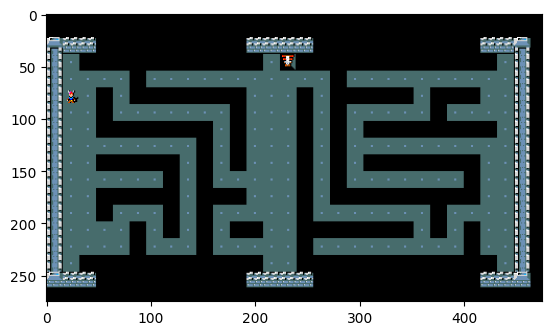

In [3]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from collections import deque
from queue import PriorityQueue
from utilsMinihackSearch import *
from typing import Tuple, List


# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file="/home/nazifa/minihack/lib/python3.8/site-packages/custom_maze.des",
)
state = env.reset()
env.render()


def hill_climbing(problem):
    current = make_node(initial_state(problem))

    while True:
        neighbor = highest_valued_successor(current, problem)
        if value(neighbor) <= value(current):
            return state(current)
        current = neighbor


def hill_climb(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[
    Tuple[int, int]]:
    current = {'state': start}
    parent = {start: None}  # Initialize the parent dictionary

    while True:
        neighbor = highest_valued_successor(current, game_map, target, h)
        if h(neighbor['state'], target) <= h(current['state'], target):
            path = build_path_HillClimb(parent, start, target)
            return path
        parent[neighbor['state']] = current['state']  # Update the parent dictionary
        current = neighbor

        # Debugging statements
        print("Parent dictionary:", parent)  
        print("Target:", target)
        print("Current state:", current['state'])  


def build_path_HillClimb(parent: dict, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    current = target

    while current is not None and current != start:
        path.append(current)
        if current not in parent:
            print(f"Target {target} not reachable from start {start}.")
            return None
        current = parent[current]

    path.append(start)  # Add the starting point to the path
    path.reverse()

    return path


def highest_valued_successor(node, game_map, target, h):
    successors = get_valid_moves(game_map, node['state'])
    successors.sort(key=lambda x: h(x, target), reverse=True)
    return {'state': successors[0]}


# Example usage:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()



plt.imshow(state['pixel'][25:300, :475])
game_map = state['chars']

start = get_player_location(game_map)
target = get_target_location(game_map)

print("Agent position:", start)
print("Target position:", target)

path = hill_climb(game_map, start, target, manhattan_distance)
if path is not None:
    actions = actions_from_path(start, path[1:])

    image = plt.imshow(state['pixel'][25:300, :475])
    for action in actions:
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        image.set_data(s['pixel'][25:300, :475])
        


This output is generated during the execution of the hill climbing algorithm. 

    Agent position: The starting position of the agent is (10, 1).
    Target position: The target position the agent wants to reach is (12, 14).

    First iteration:
        The algorithm starts with the agent at (10, 1) and explores the neighbor (9, 1). It updates the parent dictionary with the   information that the parent of (9, 1) is (10, 1).
        The target position is (12, 14), and the current state is (9, 1). The algorithm continues to explore neighbors.

    Second iteration:
        The algorithm explores the neighbor (8, 1) from (9, 1) and updates the parent dictionary accordingly.
        The target position is (12, 14), and the current state is (8, 1). The algorithm continues exploring.

    Third iteration:
        The algorithm explores the neighbor (7, 1) from (8, 1) and updates the parent dictionary.
        The target position is (12, 14), and the current state is (7, 1). The algorithm continues exploring.

    Fourth iteration:
        The algorithm explores the neighbor (6, 1) from (7, 1) and updates the parent dictionary.
        The target position is (12, 14), and the current state is (6, 1). The algorithm continues exploring.

    Fifth iteration:
        The algorithm explores the neighbor (5, 1) from (6, 1) and updates the parent dictionary.
        The target position is (12, 14), and the current state is (5, 1). The algorithm continues exploring.

    Sixth iteration:
        The algorithm explores the neighbor (4, 1) from (5, 1) and updates the parent dictionary.
        The target position is (12, 14), and the current state is (4, 1). The algorithm continues exploring.

    Seventh iteration:
        The algorithm attempts to explore the neighbor from (4, 1) but encounters a problem. It prints a message indicating that the target (12, 14) is not reachable from the start (10, 1).
        This output exprassing  hat the hill climbing algorithm couldn't find a path from the starting position (10, 1) to the target position (12, 14). The algorithm explored several states, updating the parent dictionary along the way, but it couldn't reach the target.